In [1]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
import pywt
import pywt.data
import numpy as np
from math import sqrt
from PIL import Image, ImageChops, ImageOps
import pickle

1.  С помощью библиотеки OpenCV считайте изображение:
2. Преобразуйте изображение в градации серого.

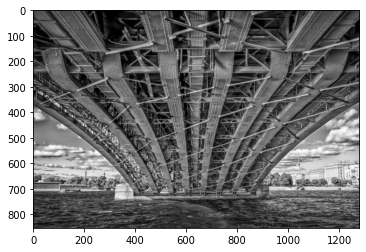

In [2]:
img = cv2.imread('/content/drive/MyDrive/Computer Vision with Deep Learning/bridge-3729954_1280.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray')

3. Выполните вейвлет-преобразование Хаара.
+ Kết quả của chức năng này, chúng tôi nhận được 4 bộ (bộ lọc) (cA, (cH, cV, cD)) (trung bình và 3 bộ chi tiết - ngang, dọc và chéo). Trong trường hợp rời rạc, các bộ lọc được chỉ định đơn giản bằng cách liệt kê các giá trị (hệ số) của chúng tại các điểm lấy mẫu.

In [3]:
wavelet = 'haar'
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD)= c

In [5]:
cV

array([[-33.5,  43.5,  -9.5, ...,  -2.5, -17.5,  -3.5],
       [ -4.5, -46.5,  45. , ...,  -5.5,  -2. ,   8. ],
       [ 11. ,   1. , -50. , ...,   4. ,  14. , -10. ],
       ...,
       [ -2. ,   1.5,   1. , ...,   8. ,  -1.5,  -4.5],
       [-13. ,   3.5,   5. , ...,   4.5,   1. ,  -1.5],
       [ -3. , -18. ,   0. , ...,   1. ,  12. ,  14. ]])

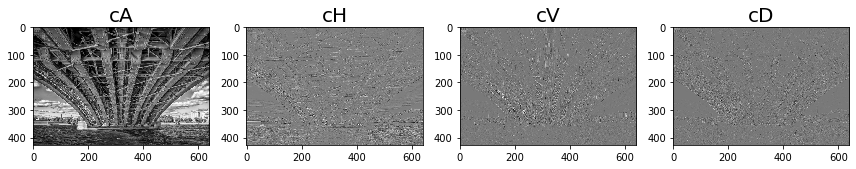

In [4]:
titles = ['cA', 'cH', 'cV', 'cD']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
  ax = fig.add_subplot(1, 4, i + 1)
  ax.imshow(a, interpolation="nearest", cmap = 'gray')
  ax.set_title(titles[i], fontsize=20)
fig.tight_layout()
plt.show()


In [11]:
# It is False
hist, bin_edges = np.histogram(cV, density=True)
print(f"Max = {hist.max()}")

Max = 0.020805568853752884


# **Ex2**

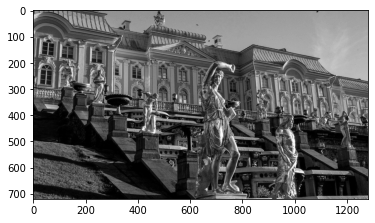

In [34]:
img = cv2.imread('/content/drive/MyDrive/Computer Vision with Deep Learning/st-petersburg-3393467_1280.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap='gray')

In [35]:
# Выполните вейвлет-преобразование Хаара.
wavelet = 'haar'
c = pywt.dwt2(image,wavelet)
cA, (cH, cV, cD)= c

In [36]:
cA1, (cH1, cV1, cD1) = pywt.dwt2(cA,wavelet)
c = cA1, (cH1, cV1, cD1)

In [37]:
print('Количество нулей в наборе cA =',sum(sum(c[0][m] == 0) for m in range(len(c[0]))))
print('Количество нулей в наборе cH =',sum(sum(c[1][0][m] == 0) for m in range(len(c[1][0]))))
print('Количество нулей в наборе cV =',sum(sum(c[1][1][m] == 0) for m in range(len(c[1][1]))))
print('Количество нулей в наборе cD =',sum(sum(c[1][2][m] == 0) for m in range(len(c[1][2]))))

Количество нулей в наборе cA = 334
Количество нулей в наборе cH = 685
Количество нулей в наборе cV = 908
Количество нулей в наборе cD = 802


In [38]:
threshold = 50
h1 = cA1.shape[0] # у нас все наборы имеют вид квадратной матрицы
for i in range(h1):
      c[0][i][np.abs(c[0][i])<threshold] = 0.0 # для cA1
      for j in range(len(c[1])):
         c[1][j][i][np.abs(c[1][j][i])<threshold] = 0.0  # для cH,cV,cD
print('Количество нулей =',(sum(sum(sum(c[1][m][n] == 0) for n in range(h1)) for m in range(len(c[1])))) + sum(sum(c[0][m] == 0) for m in range(h1)))


Количество нулей = 159126


In [39]:
image.shape[1]

1280

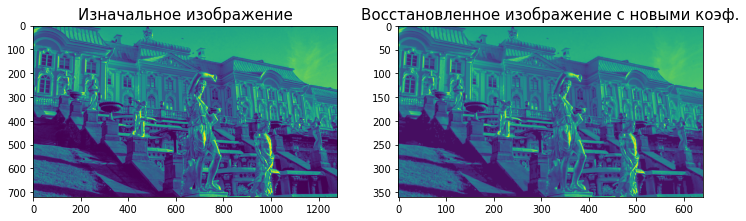

In [40]:
w, h = 720,1280
c_inverse1 = pywt.idwt2((c),wavelet)[:h,:w]  # коэф. с обнулены в предыдущем строке
titles1 = ['Изначальное изображение', 'Восстановленное изображение c новыми коэф.']
fig1 = plt.figure(figsize=(12, 6))
for i, a in enumerate([image,c_inverse1]):
  ax = fig1.add_subplot(1, 2, i + 1)
  ax.imshow(a)
  ax.set_title(titles1[i], fontsize=15)
fig.tight_layout()
plt.show()